# BDO Data cleaning and analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("bdo_cars.csv")

## Sample Data

In [4]:
data.tail(100)

,Unnamed: 0,brand,generic_text,year,mileage,color,plate,price,location
219,219,Mitsubishi,"Montero Sport GLX 2.4 2WD, M/T, DSL",2023,13T,Jet Black Mica,MAS 1555,"1,300,000",Panabo City
220,220,Mitsubishi,"Montero Sport GLX 2WD 2.4, M/T, DSL",2021,31T,Sterling Silver Metallic,CAW 1496,"1,119,000",Bacolod
221,221,Mitsubishi,"Montero Sport GLX 2WD 2.4, M/T, DSL",2022,17T (per checklist),White Diamond,KAF 2677,"1,193,000",Cagayan de Oro
222,222,Mitsubishi,"Montero Sport GLX-V 4x2 2.5, M/T, DSL",2012,143T,Savanna White,UCI 725 (CRE),"389,000","Howmart, QC"
223,223,Mitsubishi,"Montero Sport GT 4WD 2.4, A/T, DSL",2018,82T,Sterling Silver Metallic,NCS 8805,"1,236,000","Howmart, QC"
...,...,...,...,...,...,...,...,...,...
314,314,Toyota,"Vios 1.5 G, A/T, Gas",2019,57T,Black,NDO 8141,"533,000",MOA - PASAY
315,315,Toyota,"Wigo 1.0 G, A/T, GAS",2021,19T,Black,EAF 5783,"474,000",MOA - PASAY
316,316,Volkswagen,"Polo NB 1.6L Trendline, A/T, Gas",2016,58T,Red,FAB 1967,"320,000",MOA - PASAY
317,317,Volkswagen,"Santana 1.5L MPI, A/T, Gas",2019,19T,Silver Metallic,NAN 3264,"458,000",MOA - PASAY


## Columns

In [5]:
data.columns

Index(['Unnamed: 0', 'brand', 'generic_text', 'year', 'mileage', 'color',
       'plate', 'price', 'location'],
      dtype='object')

## Relevant Features
1. brand
2. generic_text - contains car model, engine displacement, fuel type, transmission
3. year
4. mileage
5. color
6. price

## Data Cleaning

### Challenges with this data set
1. Model, transamission, engine displacement and fuel is embedded in generic_text
2. Mileage is in composite form, 4T = 4000
3. Price has special characters


### Data transformation

#### Extracting model, transmission, and fuel to new properties, dropping the engine displacement property

In [6]:
data[['model', 'transmission', 'fuel']] = data['generic_text'].str.split(',', expand=True)
data.head(10)

,Unnamed: 0,brand,generic_text,year,mileage,color,plate,price,location,model,transmission,fuel
0,0,Changan,"CS35 Plus 1.4 Luxe, A/T, Gas",2023,4T,Black/Red,NIL 5623,"1,012,000",MOA - PASAY,CS35 Plus 1.4 Luxe,A/T,Gas
1,1,Chery,"Tiggo 7 Pro 1.5L, A/T, Gas",2022,1T,Red,NEE 5392 CS# I0 O092 (WITHOUT PLATES),"959,000",MOA - PASAY,Tiggo 7 Pro 1.5L,A/T,Gas
2,2,Chery,"Tiggo 7 Pro, A/T, GAS",2022,17T,Red,NGQ 3019,"943,000","Gateway Bus Park, Gen. Trias, Cavite",Tiggo 7 Pro,A/T,GAS
3,3,Chevrolet,"Camaro RS V6 3.6, A/T, GAS",2019,28T (per checklist),Orange Crush,NGS 9134 (VIRTUAL PLATE),"2,343,000",Bacolod,Camaro RS V6 3.6,A/T,GAS
4,4,Chevrolet,"Colorado High Country Storm 4x4 2.8L, A/T, DSL",2020,58T (per checklist),Orange,FAL 1300 CS# W0 E343 (WITHOUT PLATES),"863,000",Bacolod,Colorado High Country Storm 4x4 2.8L,A/T,DSL
5,5,Chevrolet,"Colorado LT 4x2 2.5L, M/T, DSL",2019,6T,Switchblade Silver,FAG 1847 CS# WE5756 (WITHOUT PLATES),"757,000",Bacolod,Colorado LT 4x2 2.5L,M/T,DSL
6,6,Chevrolet,"Colorado LT 4x2 2.5L, M/T, DSL",2019,74T,Orange,FAE 8551,"714,000","Bolilao, Iloilo",Colorado LT 4x2 2.5L,M/T,DSL
7,7,Chevrolet,"Colorado LTX 4x2 2.8, A/T, DSL",2017,120T,Mountain Blue,NCM 7809,"629,000","Howmart, QC",Colorado LTX 4x2 2.8,A/T,DSL
8,8,Chevrolet,"Colorado LTZ 4x4 2.8, A/T, DSL",2019,108T,Summit White,NCU 9367,"837,000","Gateway Bus Park, Gen. Trias, Cavite",Colorado LTZ 4x4 2.8,A/T,DSL
9,9,Chevrolet,"Colorado LTZ Pro 4x4 2.8L, A/T, DSL",2016,135T,Summit White,NCE 2156,"586,000","Gateway Bus Park, Gen. Trias, Cavite",Colorado LTZ Pro 4x4 2.8L,A/T,DSL


#### Converting mileage to numbers

In [7]:
def convert_to_numeric(value):
    try:
        return int(value.split('T')[0]) * 1000
    except:
        return 0
        
data['converted_mileage'] = data['mileage'].apply(convert_to_numeric)

In [8]:
data.head(2)

,Unnamed: 0,brand,generic_text,year,mileage,color,plate,price,location,model,transmission,fuel,converted_mileage
0,0,Changan,"CS35 Plus 1.4 Luxe, A/T, Gas",2023,4T,Black/Red,NIL 5623,"1,012,000",MOA - PASAY,CS35 Plus 1.4 Luxe,A/T,Gas,4000
1,1,Chery,"Tiggo 7 Pro 1.5L, A/T, Gas",2022,1T,Red,NEE 5392 CS# I0 O092 (WITHOUT PLATES),"959,000",MOA - PASAY,Tiggo 7 Pro 1.5L,A/T,Gas,1000


#### Normalizing transimssion values

In [9]:
data['transmission'] = data['transmission'].str.replace(' A/T', 'automatic')
data['transmission'] = data['transmission'].str.replace(' A.T', 'automatic')
data['transmission'] = data['transmission'].str.replace(' M/T', 'manual')
data['transmission'] = data['transmission'].str.replace(' manual', 'manual')
data['transmission'] = data['transmission'].str.replace('manual GAS', 'manual')
data['transmission'] = data['transmission'].str.replace(' M/T GAS', 'manual')
data['transmission'] = data['transmission'].str.replace(' DSL - For Hire', 'none')

data['transmission'].unique()

array(['automatic', 'manual', 'none'], dtype=object)

#### Normalizing fuel values

In [10]:
data['fuel'] = data['fuel'].str.replace('DSL', 'dsl')
data['fuel'] = data['fuel'].str.replace('GAS', 'gas')
data['fuel'] = data['fuel'].str.replace('Gas', 'gas')
data['fuel'] = data['fuel'].str.replace(' gas', 'gas')
data['fuel'] = data['fuel'].str.replace(' dsl', 'dsl')
data['fuel'] = data['fuel'].str.replace('dsl (For Hire)', 'dsl')
data['fuel'] = data['fuel'].str.replace('dsl - Upgraded', 'dsl')
data['fuel'] = data['fuel'].str.replace(' dsl - Upgraded', 'dsl')
data['fuel'] = data['fuel'].str.replace('DSL - Upgraded', 'dsl')
data['fuel'] = data['fuel'].str.replace('dsl - For Hire', 'dsl')
data['fuel'] = data['fuel'].str.replace('DSL - For Hire', 'dsl')

data['fuel'].unique()

array(['gas', 'dsl', None], dtype=object)

#### Converting price to int

In [11]:
data['price'] = data['price'].str.replace('[^\d]', '', regex=True).astype('int')

data.head(2)

,Unnamed: 0,brand,generic_text,year,mileage,color,plate,price,location,model,transmission,fuel,converted_mileage
0,0,Changan,"CS35 Plus 1.4 Luxe, A/T, Gas",2023,4T,Black/Red,NIL 5623,1012000,MOA - PASAY,CS35 Plus 1.4 Luxe,automatic,gas,4000
1,1,Chery,"Tiggo 7 Pro 1.5L, A/T, Gas",2022,1T,Red,NEE 5392 CS# I0 O092 (WITHOUT PLATES),959000,MOA - PASAY,Tiggo 7 Pro 1.5L,automatic,gas,1000


#### Removing unesesarry column

In [12]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.columns

Index(['brand', 'generic_text', 'year', 'mileage', 'color', 'plate', 'price',
       'location', 'model', 'transmission', 'fuel', 'converted_mileage'],
      dtype='object')

In [13]:
data.head()

,brand,generic_text,year,mileage,color,plate,price,location,model,transmission,fuel,converted_mileage
0,Changan,"CS35 Plus 1.4 Luxe, A/T, Gas",2023,4T,Black/Red,NIL 5623,1012000,MOA - PASAY,CS35 Plus 1.4 Luxe,automatic,gas,4000
1,Chery,"Tiggo 7 Pro 1.5L, A/T, Gas",2022,1T,Red,NEE 5392 CS# I0 O092 (WITHOUT PLATES),959000,MOA - PASAY,Tiggo 7 Pro 1.5L,automatic,gas,1000
2,Chery,"Tiggo 7 Pro, A/T, GAS",2022,17T,Red,NGQ 3019,943000,"Gateway Bus Park, Gen. Trias, Cavite",Tiggo 7 Pro,automatic,gas,17000
3,Chevrolet,"Camaro RS V6 3.6, A/T, GAS",2019,28T (per checklist),Orange Crush,NGS 9134 (VIRTUAL PLATE),2343000,Bacolod,Camaro RS V6 3.6,automatic,gas,28000
4,Chevrolet,"Colorado High Country Storm 4x4 2.8L, A/T, DSL",2020,58T (per checklist),Orange,FAL 1300 CS# W0 E343 (WITHOUT PLATES),863000,Bacolod,Colorado High Country Storm 4x4 2.8L,automatic,dsl,58000


#### Create cleaned csv

In [14]:
data.to_csv('cleaned_bdo_cars.csv')

## Analysis

In [35]:
data = pd.read_csv('cleaned_bdo_cars.csv')

### Most common *feature
1. brand
2. fuel
3. transmission
4. year

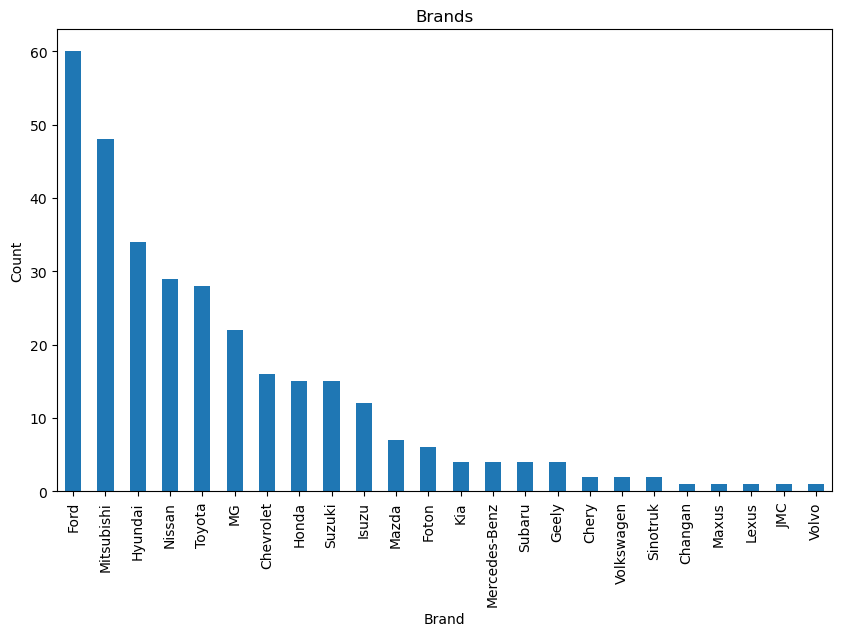

In [36]:
# brand
plt.figure(figsize=(10, 6))

data['brand'].value_counts().plot(kind = 'bar')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brands')
plt.show();

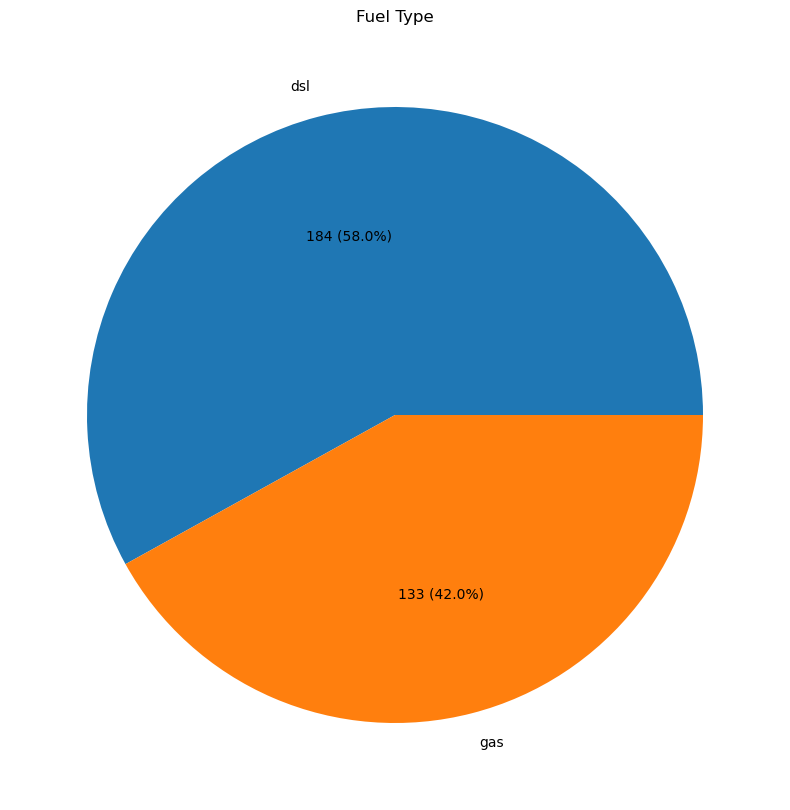

In [32]:
# fuel
fuel_value_counts = data['fuel'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(fuel_value_counts, labels=fuel_value_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(fuel_value_counts) / 100, p))
plt.title('Fuel Type')
plt.show();

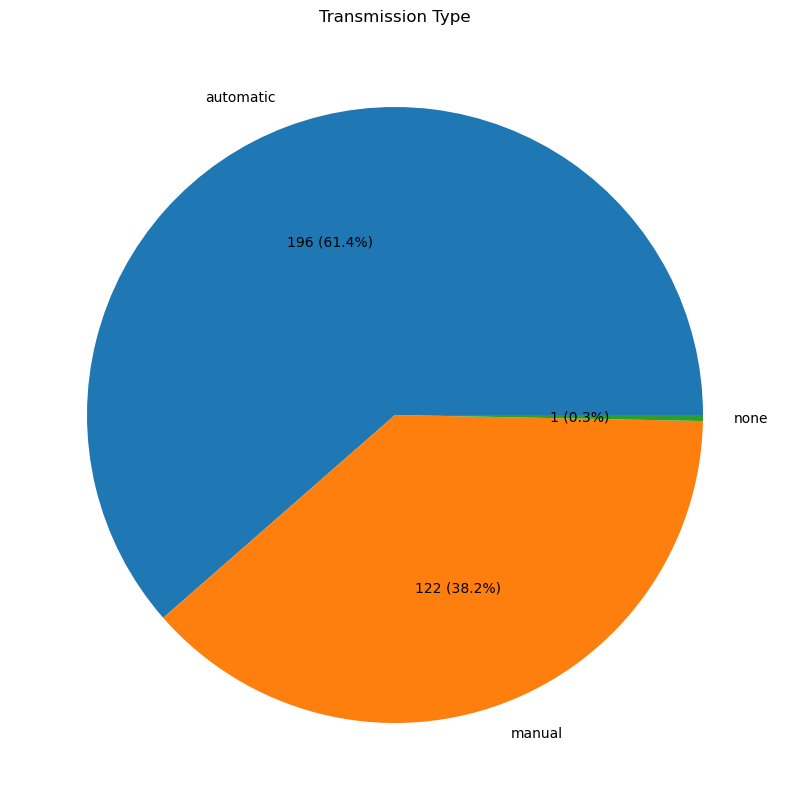

In [31]:
# tranmission
plt.figure(figsize=(10, 10))

trans_value_counts = data['transmission'].value_counts()

plt.pie(trans_value_counts, labels=trans_value_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(trans_value_counts) / 100, p))
plt.title('Transmission Type')
plt.show();

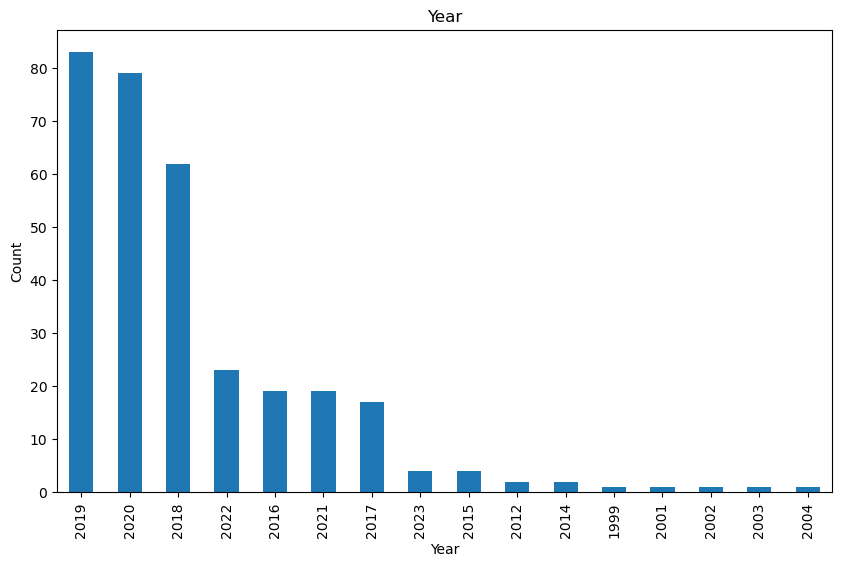

In [29]:
# year
plt.figure(figsize=(10, 6)) 

data['year'].value_counts().plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year')
plt.show();

### Price vs Feature

1. year
2. brand

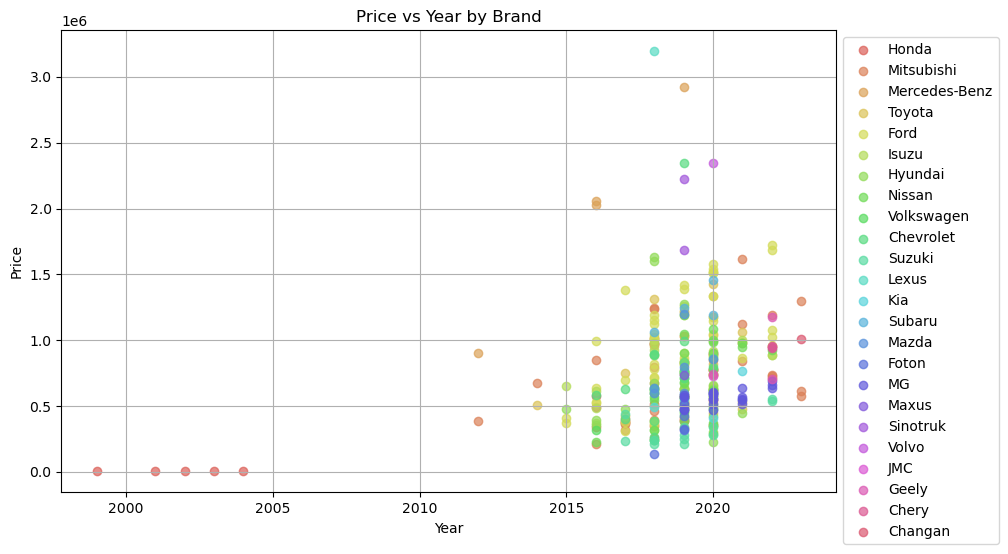

In [24]:
data_sorted_year = data.sort_values(by='year');

# Example car data (replace this with your actual data)
years = data_sorted_year['year']
prices = data_sorted_year['price']
brands = data_sorted_year['brand']

unique_brands = brands.unique()

# Get a color palette with enough colors for the number of unique brands
palette = sns.color_palette("hls", len(unique_brands))

# Create a dictionary mapping brands to colors
brand_colors = dict(zip(unique_brands, palette))

# Scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for brand in unique_brands:
    plt.scatter(np.array(years)[np.array(brands) == brand], 
                np.array(prices)[np.array(brands) == brand], 
                c=[brand_colors[brand]], label=brand, alpha=0.7)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year by Brand')

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.grid(True)
plt.show()